**Problem Statement:**

**Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import norm
import seaborn as sns

**Load the data file using pandas.**

In [4]:
gps_df = pd.read_csv('googleplaystore.csv')
gps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Check for null values in the data. Get the number of null values for each column.**

In [5]:
gps_df.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Drop records with nulls in any of the columns.**

In [6]:
gps_df.dropna(inplace=True)

In [7]:
gps_df.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Variables seem to have incorrect type and inconsistent formatting. You need to fix them:
and Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).**

In [8]:
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [9]:
gps_df.Reviews = gps_df.Reviews.astype(int)
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.8+ KB


**Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric**

**Extract the numeric value from the column**

**Multiply the value by 1,000, if size is mentioned in Mb**

In [10]:
gps_df['Mb_availability'] = gps_df.Size.str.find('M')

In [11]:
gps_df[gps_df.Mb_availability == -1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Mb_availability
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,-1
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,-1
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,-1
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up,-1
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,-1
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,-1
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up,-1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,-1


In [12]:
gps_df['size_in_numeric'] = gps_df.Size.str.replace('M','').str.replace('k','')

In [13]:
gps_df.drop(gps_df[gps_df.Size == 'Varies with device'].index,inplace=True)	

In [14]:
gps_df['size_in_numeric'] = gps_df['size_in_numeric'].astype(float)

In [15]:
gps_df['size_in_numeric'] = np.where(gps_df['Mb_availability'] != -1,gps_df['size_in_numeric']*1000,gps_df['size_in_numeric'])

In [16]:
gps_df['size_in_numeric']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: size_in_numeric, Length: 7723, dtype: float64

In [17]:
gps_df['Size'] = gps_df['size_in_numeric']
gps_df.Size = gps_df.Size.astype(int)
gps_df.drop(columns=['Mb_availability','size_in_numeric'],inplace=True)
gps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


**Installs field is currently stored as string and has values like 1,000,000+.**

**Treat 1,000,000+ as 1,000,000**

**remove ‘+’, ‘,’ from the field, convert it to integer**

In [18]:
gps_df['Installs'] = gps_df['Installs'].str.replace('+','',regex=False).str.replace(',','')

In [19]:
gps_df['Installs'] = gps_df['Installs'].astype(int)

In [20]:
gps_df['Installs'] 

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

**Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.**

In [21]:
gps_df['Price'] = gps_df['Price'].str.replace('$','',regex=False)
gps_df['Price'] = gps_df['Price'].astype(float)

In [22]:
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   int64  
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 844.7+ KB


In [23]:
gps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


**5. Sanity checks:**

**Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range**

In [24]:
gps_df.drop(gps_df[((gps_df.Rating > 5.0) | (gps_df.Rating < 1.0))].index,inplace=True)

**Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.**

In [25]:
gps_df[gps_df['Reviews'] > gps_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [26]:
gps_df.drop(gps_df[gps_df['Reviews'] > gps_df['Installs']].index,inplace=True)

**For free apps (type = “Free”), the price should not be >0. Drop any such rows**

In [27]:
gps_df.drop(gps_df[(gps_df.Type == 'Free') & (gps_df.Price > 0.0)].index,inplace=True)

**5. Performing univariate analysis:**

**Boxplot for Price**


**Are there any outliers? Think about the price of usual apps on Play Store.**

In [28]:
paid_df = gps_df[gps_df.Type == 'Paid'].Price

In [29]:
paid_df.describe()

count    575.000000
mean      15.148470
std       62.161283
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [30]:
Q1_price = 1.990000
Q3_price = 4.990000

iqr_price = Q3_price - Q1_price

upperlimit_price = Q3_price + 1.5 * iqr_price
lowerlimit_price = Q1_price - 1.5 * iqr_price

print(f'iqr = {iqr_price}, uperrlimit = {upperlimit_price}, lowerlimit = {lowerlimit_price}')

iqr = 3.0, uperrlimit = 9.49, lowerlimit = -2.51


In [31]:
gps_df[gps_df['Price'] > upperlimit_price]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1838,Star Wars ™: DIRTY,GAME,4.5,38207,15000,100000,Paid,9.99,Teen,Role Playing,"October 19, 2015",1.0.6,4.1 and up
2246,ASCCP Mobile,MEDICAL,4.5,63,25000,10000,Paid,9.99,Everyone,Medical,"October 3, 2016",2.1.1,2.2 and up
2248,Paramedic Protocol Provider,MEDICAL,4.5,171,20000,10000,Paid,10.00,Everyone 10+,Medical,"September 21, 2017",1.8.3,4.1 and up
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25000,100000,Paid,24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
2252,Essential Anatomy 3,MEDICAL,4.1,1533,42000,50000,Paid,11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,Electrician Calculator Pro,TOOLS,3.9,47,270,1000,Paid,14.99,Everyone,Tools,"June 3, 2014",3.1,1.6 and up
9304,Carrier Landings Pro,FAMILY,4.6,5969,31000,10000,Paid,12.99,Everyone,Simulation,"June 29, 2018",4.2.4,4.1 and up
9574,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2923,25000,100000,Paid,24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
10006,XCOM®: Enemy Within,FAMILY,4.2,13752,21000,100000,Paid,9.99,Mature 17+,Strategy,"October 24, 2017",1.7.0,4.0 and up


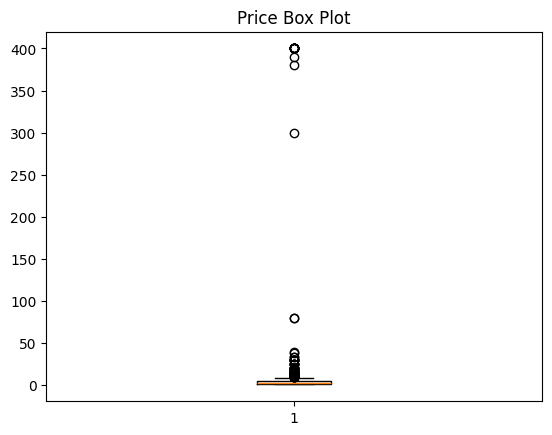

In [32]:
plt.boxplot(paid_df)
plt.title('Price Box Plot')
plt.show()
#yes there are outliers in Price

**Boxplot for Reviews**

**Are there any apps with very high number of reviews? Do the values seem right?**

In [33]:
gps_df['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

In [34]:
Q1_Reviews = 1.090000e+02
Q3_Reviews = 3.910900e+04

In [35]:
iqr_Reviews = Q3_Reviews - Q1_Reviews
upperlimit_Reviews = Q3_Reviews + 1.5 * iqr_Reviews
lowerlimit_Reviews = Q1_Reviews - 1.5 * iqr_Reviews

In [36]:
print(f'iqr = {iqr_Reviews}, upperlimit = {upperlimit_Reviews}, lowerlimit = {lowerlimit_Reviews}')

iqr = 39000.0, upperlimit = 97609.0, lowerlimit = -58391.0


In [37]:
gps_df[gps_df['Reviews'] > upperlimit_Reviews]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24000,10000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986,35000,5000000,Free,0.0,Everyone,Auto & Vehicles,"August 2, 2018",1.9.7,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400,10000000,Free,0.0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
10781,Modern Strike Online,GAME,4.3,834117,44000,10000000,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
10784,Big Hunter,GAME,4.3,245455,84000,10000000,Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24000,1000000,Free,0.0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up


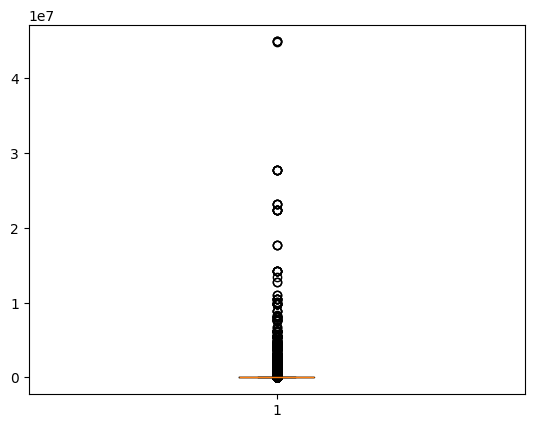

In [38]:
plt.boxplot(gps_df['Reviews'])
plt.show()
#the reason of boxplot being small is because of upperLimit and lowerlimit range is small compared to min and max
#yes there are outliers in Review

**Histogram for Rating**

**How are the ratings distributed? Is it more toward higher ratings?**

In [39]:
gps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


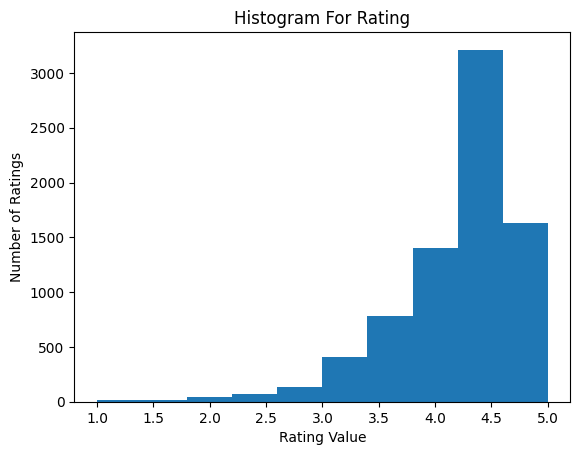

In [40]:
plt.hist(gps_df.Rating)
plt.title('Histogram For Rating')
plt.xlabel("Rating Value")
plt.ylabel("Number of Ratings")
plt.show()

**The histogram shows more ratings for higher values**

**Histogram for Size**

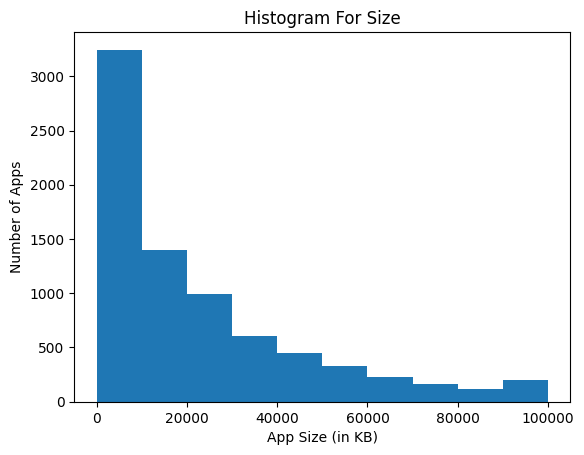

In [41]:
plt.hist(gps_df.Size)
plt.title('Histogram For Size')
plt.xlabel("App Size (in KB)")
plt.ylabel("Number of Apps")
plt.show()

**6. Outlier treatment:**

**1. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!**

**Check out the records with very high price**

**Is 200 indeed a high price?**

**Drop these as most seem to be junk apps**

**Hypothesis**

**H0: The average price of paid apps is less than or equal to $200.**


**Ha: The average price of paid apps is greater than $200.**

In [42]:
# the reason im using paid_df is to get more accurate values paid_df is just type == paid
avegrage = paid_df.mean()
std = paid_df.std()
sample = 200
alpha = 0.05
print(f'{avegrage}, {std}, {sample}, {alpha}')

15.148469565217393, 62.16128288563697, 200, 0.05


In [44]:
gps_df = gps_df.reset_index(drop=True)

In [43]:
#to answer this question Is 200 indeed a high price?
#We can see that the p-value is less than alpha so we reject the null hypothesis
(1 - norm.cdf(200,paid_df.mean(),paid_df.std())) < alpha

np.True_

In [45]:
gps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7713,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7714,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7715,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [46]:
for index_no,value in enumerate(gps_df['Price']):
    p_value = 1 - norm.cdf(value,paid_df.mean(),paid_df.std())
    if p_value < alpha:
        gps_df.drop(index_no, axis=0,inplace=True)

gps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7713,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7714,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7715,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


**Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.**

In [47]:
gps_df.drop(gps_df[gps_df.Reviews > 2000000].index, inplace=True)

**Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.**

**Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99**

**Decide a threshold as cutoff for outlier and drop records having values more than that**

In [48]:
np.percentile(gps_df['Installs'],[10,25,50,70,95,99])

array([1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 5.e+07])

In [49]:
Q1_Installs = np.percentile(gps_df['Installs'],[25])
Q2_Installs = np.percentile(gps_df['Installs'],[50])
Q3_Installs = np.percentile(gps_df['Installs'],[75])

In [50]:
iqr_Installs = Q3_Installs - Q1_Installs
iqr_Installs

array([990000.])

In [51]:
upperlimit_Installs =  Q3_Installs + 1.5*iqr_Installs
lowerlimit_Installs =  Q1_Installs - 1.5*iqr_Installs
print(f'upper limit {upperlimit_Installs}, lower limit {lowerlimit_Installs}')

upper limit [2485000.], lower limit [-1475000.]


In [52]:
gps_df[gps_df['Installs'] > upperlimit_Installs[0]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000,10000000,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
17,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up
18,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7645,FeaturePoints: Free Gift Cards,FAMILY,3.9,121321,46000,5000000,Free,0.0,Everyone,Entertainment,"October 22, 2016",8.7,4.0.3 and up
7651,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400,10000000,Free,0.0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
7677,Modern Strike Online,GAME,4.3,834117,44000,10000000,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
7680,Big Hunter,GAME,4.3,245455,84000,10000000,Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up


In [53]:
gps_df.drop(gps_df[gps_df['Installs'] > upperlimit_Installs[0]].index,inplace=True)

**7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.**

**Make scatter plot/joinplot for Rating vs. Price**

**What pattern do you observe? Does rating increase with price?**

In [54]:
gps_df['Rating'].corr(gps_df['Price'])

np.float64(0.03417964053910078)

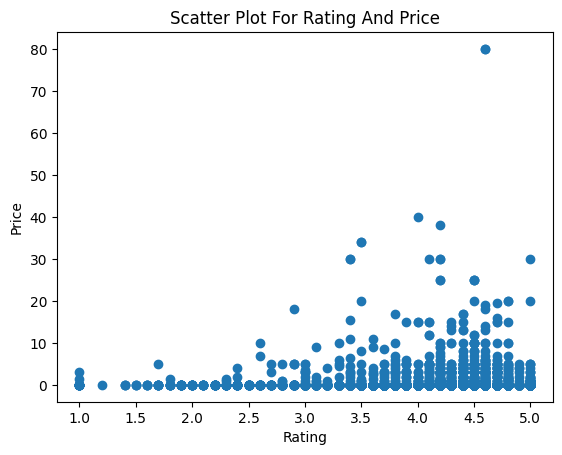

In [55]:
plt.scatter(gps_df['Rating'],gps_df['Price'])
plt.title('Scatter Plot For Rating And Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

In [56]:
#Does rating increase with price? answer is yes but it's very insubstantial
#because there is very weak positive correlation

**Make scatter plot/joinplot for Rating vs. Size**

**Are heavier apps rated better?**

In [56]:
gps_df['Rating'].corr(gps_df['Size'])

np.float64(0.028403959517753943)

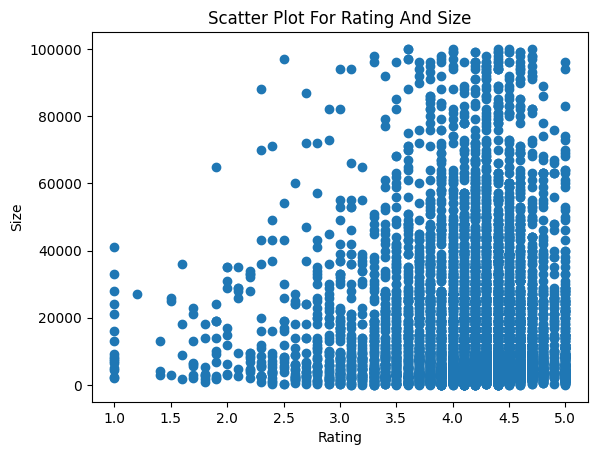

In [57]:
plt.scatter(gps_df['Rating'],gps_df['Size'])
plt.title('Scatter Plot For Rating And Size')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.show()

In [59]:
#Are heavier apps rated better? answer is yes but it's very insubstantial

**Make scatter plot/joinplot for Rating vs. Reviews**

**Does more review mean a better rating always?**

In [58]:
gps_df['Rating'].corr(gps_df['Reviews'])

np.float64(0.1344675967724873)

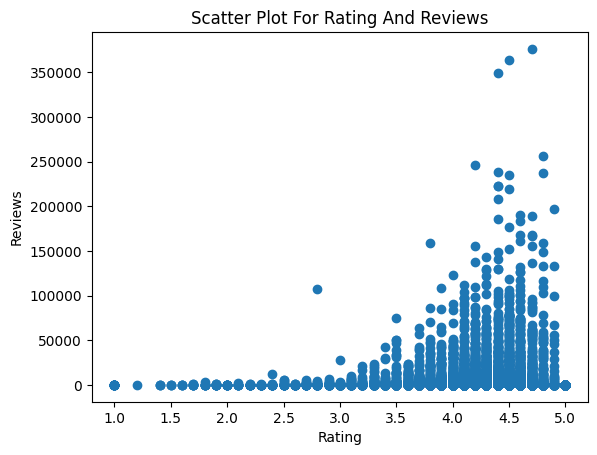

In [59]:
plt.scatter(gps_df['Rating'],gps_df['Reviews'])
plt.title('Scatter Plot For Rating And Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

**Does more review mean a better rating always? answer is yes**

**because they have a good positive correlation**

**Make boxplot for Rating vs. Content Rating**

**Is there any difference in the ratings? Are some types liked better?**

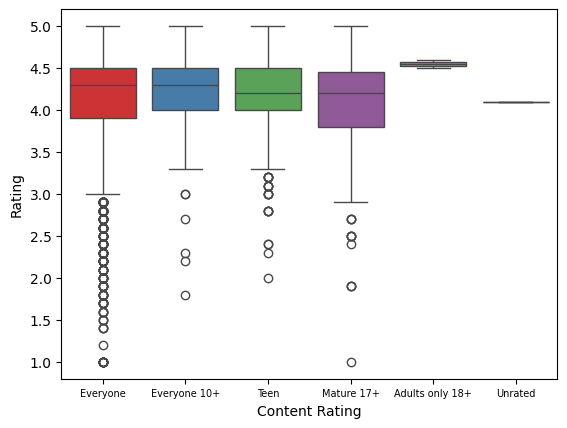

In [60]:
sns.boxplot(x=gps_df['Content Rating'],y=gps_df['Rating'],palette="Set1")
plt.xticks(fontsize=7)
plt.show()

**Is there any difference in the ratings?  Yes The boxes have different widths, indicating a wider range of ratings for some content ratings.**


**Are some types liked better? Yes The median rating is higher for some content ratings.**

**Make boxplot for Ratings vs. Category**

**Which genre has the best ratings?**

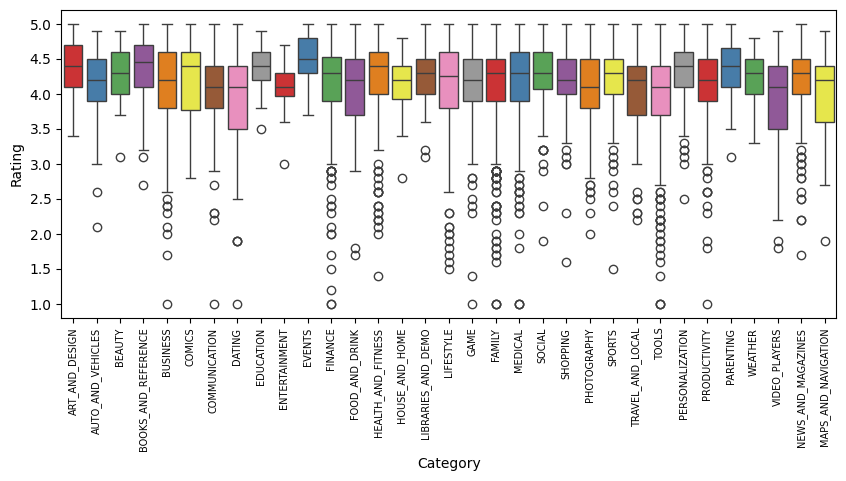

In [61]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=gps_df['Category'],y=gps_df['Rating'],palette="Set1")
plt.xticks(fontsize=7)
plt.xticks(rotation=90) 
plt.show()

In [64]:
gps_df[gps_df['Category'] == 'EVENTS']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
686,All Events in City,EVENTS,4.0,3782,9500,100000,Free,0.0,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up
688,Reminder,EVENTS,4.5,7074,6300,500000,Free,0.0,Everyone,Events,"June 25, 2018",1.57,4.1 and up
689,Birdays - Birthday reminder,EVENTS,4.5,2153,5900,50000,Free,0.0,Everyone,Events,"December 14, 2017",1.5.0,4.1 and up
690,Fever,EVENTS,4.0,20611,12000,1000000,Free,0.0,Teen,Events,"July 18, 2018",4.3.6,4.1 and up
691,DroidAdmin for Android - Advice,EVENTS,4.2,811,2800,10000,Free,0.0,Everyone,Events,"May 29, 2018",3.8,4.0 and up
692,"SeatGeek – Tickets to Sports, Concerts, Broadway",EVENTS,4.4,15558,26000,1000000,Free,0.0,Everyone,Events,"August 3, 2018",2018.07.31229,5.0 and up
693,my4D,EVENTS,4.6,573,8700,100000,Free,0.0,Everyone,Events,"July 12, 2018",1.40,4.2 and up
694,Vivid Seats – Event Tickets,EVENTS,4.6,8232,53000,1000000,Free,0.0,Everyone,Events,"July 31, 2018",Varies with device,5.0 and up
695,LBB - Find New & Unique Things To Do Around You,EVENTS,4.6,3874,14000,100000,Free,0.0,Everyone,Events,"July 27, 2018",4.0.19,4.2 and up
696,Happy Birthday Songs Offline,EVENTS,4.4,464,8900,100000,Free,0.0,Everyone,Events,"December 4, 2017",1.3,4.1 and up


**Which genre has the best ratings?** 
**Events has the best Rating**

**8. Data preprocessing**

**For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.**

In [65]:
inp1 = gps_df.reset_index(drop=True)
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
3,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
5950,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
5951,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
5952,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


**Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.**

In [66]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
3,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.187386,19000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,FR Tides,WEATHER,3.8,7.086738,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
5950,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
5951,FR Calculator,FAMILY,4.0,2.079442,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
5952,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [67]:
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
3,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,5.187386,19000,10.819798,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,FR Tides,WEATHER,3.8,7.086738,582,11.512935,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
5950,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,619,6.908755,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
5951,FR Calculator,FAMILY,4.0,2.079442,2600,6.216606,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
5952,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000,8.517393,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


**Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task**

In [68]:
inp1.drop(columns=['App', 'Last Updated','Current Ver','Android Ver'],inplace=True)

In [69]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        5954 non-null   object 
 1   Rating          5954 non-null   float64
 2   Reviews         5954 non-null   float64
 3   Size            5954 non-null   int64  
 4   Installs        5954 non-null   float64
 5   Type            5954 non-null   object 
 6   Price           5954 non-null   float64
 7   Content Rating  5954 non-null   object 
 8   Genres          5954 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 418.8+ KB


**Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.**

In [70]:
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating','Type'])
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Columns: 152 entries, Rating to Type_Paid
dtypes: bool(147), float64(4), int32(1)
memory usage: 1.0 MB


**9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.**

In [71]:
y = inp2['Rating']
y

0       4.1
1       3.9
2       4.3
3       4.4
4       3.8
       ... 
5949    3.8
5950    4.8
5951    4.0
5952    4.5
5953    5.0
Name: Rating, Length: 5954, dtype: float64

In [72]:
x = inp2.drop(columns='Rating')
x

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
0,5.075174,19000,9.210440,0.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,6.875232,14000,13.122365,0.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,6.875232,2800,11.512935,0.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,5.123964,5600,10.819798,0.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,5.187386,19000,10.819798,0.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,7.086738,582,11.512935,0.0,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
5950,3.806662,619,6.908755,0.0,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
5951,2.079442,2600,6.216606,0.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
5952,3.663562,53000,8.517393,0.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


**10. Separate the dataframes into X_train, y_train, X_test, and y_test.**

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.30)

In [74]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [75]:
x_train.shape

(4167, 151)

In [76]:
y_train.shape

(4167,)

In [77]:
x_test.shape

(1787, 151)

In [78]:
y_test.shape

(1787,)

In [79]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.shape

(4167, 152)

In [80]:
df_test = pd.concat([x_test, y_test], axis=1)
df_test.shape

(1787, 152)

**11 . Model building**

**Use linear regression as the technique**

**Report the R2 on the train set**

In [81]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [82]:
model_gps = LinearRegression().fit(x_train,y_train)

**2. Make predictions on test set and report R2**

In [83]:
predicted_Rating = pd.DataFrame(model_gps.predict(x_test),columns=['Rating'])
predicted_Rating

,Rating
0,4.103597
1,3.736607
2,4.176076
3,3.989208
4,4.256944
...,...
1782,4.115329
1783,4.223441
1784,3.825889
1785,4.146836


In [84]:
predicted_model = x_test

In [85]:
predicted_model['original_Rating'] = y_test

In [86]:
predicted_model['predicted_Rating'] = round(predicted_Rating,1)

In [87]:
predicted_model.loc[:, ['original_Rating', 'predicted_Rating']]

,original_Rating,predicted_Rating
0,4.5,4.1
1,3.4,3.7
2,3.9,4.2
3,4.0,4.0
4,3.7,4.3
...,...,...
1782,4.8,4.1
1783,4.6,4.2
1784,4.1,3.8
1785,2.9,4.1


In [88]:
r2_score(predicted_model.original_Rating,predicted_model.predicted_Rating)

0.12754355785665772

In [89]:
predicted_model['err_pct'] = abs((predicted_model.original_Rating - predicted_model.predicted_Rating)/predicted_model.original_Rating)

In [90]:
predicted_model.loc[:, ['original_Rating', 'predicted_Rating','err_pct']]

,original_Rating,predicted_Rating,err_pct
0,4.5,4.1,0.088889
1,3.4,3.7,0.088235
2,3.9,4.2,0.076923
3,4.0,4.0,0.000000
4,3.7,4.3,0.162162
...,...,...,...
1782,4.8,4.1,0.145833
1783,4.6,4.2,0.086957
1784,4.1,3.8,0.073171
1785,2.9,4.1,0.413793


In [91]:
predicted_model.err_pct.mean()

0.11408093082836504

In [92]:
1 - predicted_model.err_pct.mean()

0.885919069171635